### Dor_Natan , 315533067

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
url = "https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv"
NBA_df = pd.read_csv(url)
NBA_df.tail(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
448,Gordon Hayward,Utah Jazz,20.0,SF,26.0,6-8,226.0,Butler,15409570.0
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6-8,226.0,NaN,2050000.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


q1

In [168]:
NBA_df = NBA_df.dropna()
NBA_df[['Age','Height','Weight','Salary']].head(3)

,Age,Height,Weight,Salary
0,25.0,6-2,180.0,7730337.0
1,25.0,6-6,235.0,6796117.0
3,22.0,6-5,185.0,1148640.0


q2

In [169]:
NBA_df["Height"] = NBA_df["Height"].astype('category').cat.codes
NBA_df[['Age','Height','Weight','Salary']].head(3)

,Age,Height,Weight,Salary
0,25.0,6,180.0,7730337.0
1,25.0,10,235.0,6796117.0
3,22.0,9,185.0,1148640.0


q3

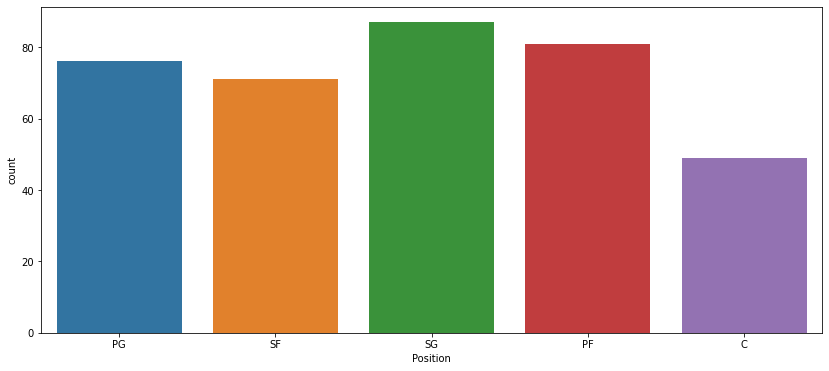

In [170]:
plt.figure(figsize=(14,6))
sns.countplot( x='Position',data = NBA_df)
plt.show()

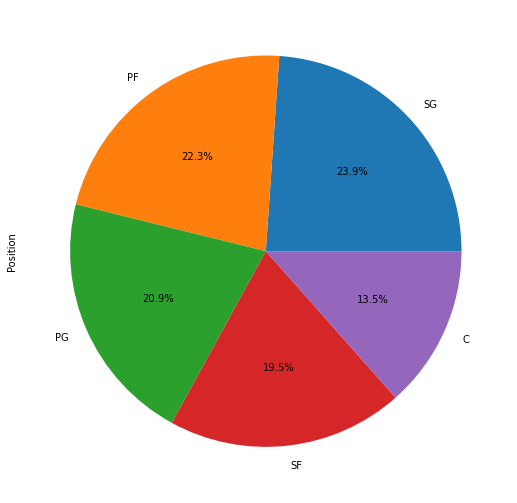

In [171]:
plt.figure(figsize=(18,9))
NBA_df["Position"].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### לפי דעתי ניתן לראות את הדאטה בצורה טובה יותר ב
### Countplot
### מכיוון שבו ניתן לראות בבירור יותר את ההבדלים במספר השחקנים המשחקים בכל עמדה
### ב"עוגה" גם ניתן לשים לב להבדל אך זה פחות קופץ לעין

q4

In [172]:
nba_features = ['Age','Height','Weight']
label = ['Salary']
X = NBA_df[nba_features]
y = NBA_df[label]
X.head()

,Age,Height,Weight
0,25.0,6,180.0
1,25.0,10,235.0
3,22.0,9,185.0
6,21.0,12,235.0
7,25.0,14,238.0


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
X_train.head()

,Age,Height,Weight
332,22.0,11,232.0
285,26.0,10,220.0
191,26.0,7,208.0
24,21.0,5,200.0
181,33.0,13,245.0


In [174]:
y_test.head()

,Salary
232,2085671.0
42,1636842.0
19,6300000.0
435,3075880.0
71,3553917.0


q5

In [175]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

### מכיוון שהנתונים הקיימים הם נומריים אז אנו מעדיפים להשתמש ברגרסיה כשיטת חיזוי

q6

In [176]:
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    print("MSE: {:.3f}".format(mse(pred,y_test,squared=False)))

In [177]:
eval(X_test,y_test,model)

MSE: 7102040.645


q7

In [178]:
NBA_df['Position'] = NBA_df['Position'].astype('category').cat.codes
nba_features = ['Age','Height','Weight','Position']
nba_label = ['Salary']

X = NBA_df[nba_features]
y = NBA_df[nba_label]

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
X_train.head()

,Age,Height,Weight,Position
332,22.0,11,232.0,3
285,26.0,10,220.0,4
191,26.0,7,208.0,2
24,21.0,5,200.0,1
181,33.0,13,245.0,0


In [180]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [181]:
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    print("MSE: {:.3f}".format(mse(pred,y_test,squared=False)))

In [187]:
eval(X_test,y_test,model)

MSE: 6482536.856


### לאחר הוספת העמודה של 
### "Position"
### קיימת ירידה בערך של 
### MSE
### ולכן ניתן להגיד כי המודל החדש טוב יותר

q8

In [188]:
model_md= sk.tree.DecisionTreeRegressor(max_depth=4,random_state=42)
model_md.fit(X_train, y_train)
test_pred = model_md.predict(X_test)
eval(X_test,y_test,model_md)

MSE: 4600346.035
